# Práctica 3

In [1]:
import numpy
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy import signal
import cv2

### Funciones generales:

In [2]:
def cargar(nombre):
    img = Image.open(nombre).convert(mode='L')
    return np.array(img)


def mostrar(imagen, titulo=""):
    plt.figure(figsize=(9, 9))
    if (titulo): plt.title(titulo)
    plt.imshow(imagen, cmap='gray', vmin=0, vmax=255)


def pasarALog(imagen):
    c = 255 / np.log(1 + np.max(imagen))
    resultado = np.uint8(c * np.log(1 + imagen))
    return resultado


# valor entre 0 y 255
def aplicar_umbral(imagen, valor):
    return np.uint8(np.greater(imagen, valor) * 255)


# suavizado:
def suavizado_promedio(imagen, dimension):
    H = np.ones((dimension, dimension)) / dimension ** 2
    return signal.convolve2d(imagen, H, boundary="symm", mode="same")


def eqHist(imagen):
    hist = np.histogram(imagen, 256, range=(0, 256))
    acumulado = np.cumsum(hist[0])
    normalizado = 255 * ((acumulado - acumulado.min()) / (acumulado.max() - acumulado.min()))
    resultado = np.uint8(normalizado[imagen])
    return resultado


def ventana_gauss(dimension, desviacion):
    gauss1d = signal.windows.gaussian(dimension, desviacion)
    gauss2d = np.outer(gauss1d, gauss1d)
    return gauss2d / sum(sum(gauss2d))


def suavizado_gauss(imagen, std):
    gauss = ventana_gauss(int(4 * std), std)
    return signal.convolve2d(imagen, gauss, boundary="symm", mode="same")


def bordes_gradiente(imagen, umbral, metodo="roberts"):
    #roberts:
    h1 = np.array([[-1., 0.], [0., 1.]])
    h2 = np.flip(h1, axis=1)

    if metodo == "prewitt":
        h1 = np.array([[-1., -1., -1.], [0., 0., 0.], [1., 1., 1.]])
        h2 = h1.T

    if metodo == "sobel":
        h1 = np.array([[-1., -2., -1.], [0., 0., 0.], [1., 2., 1.]])
        h2 = h1.T

    im1 = signal.convolve2d(imagen, h1, boundary="symm", mode="same")
    im2 = signal.convolve2d(imagen, h2, boundary="symm", mode="same")

    imagen_res = np.abs(im1) + np.abs(im2)

    return aplicar_umbral(imagen_res, umbral)


### Detección de líneas

In [3]:

video = cv2.VideoCapture("camino1.avi")
fps = video.get(cv2.CAP_PROP_FPS)
_, frame = video.read()

In [4]:
frame1 = frame[:, :, 0]
mostrar(frame1)

TypeError: ignored

In [ ]:
fps

25.0

In [5]:
mostrar(bordes_gradiente(frame1, 200, "sobel"))

NameError: ignored

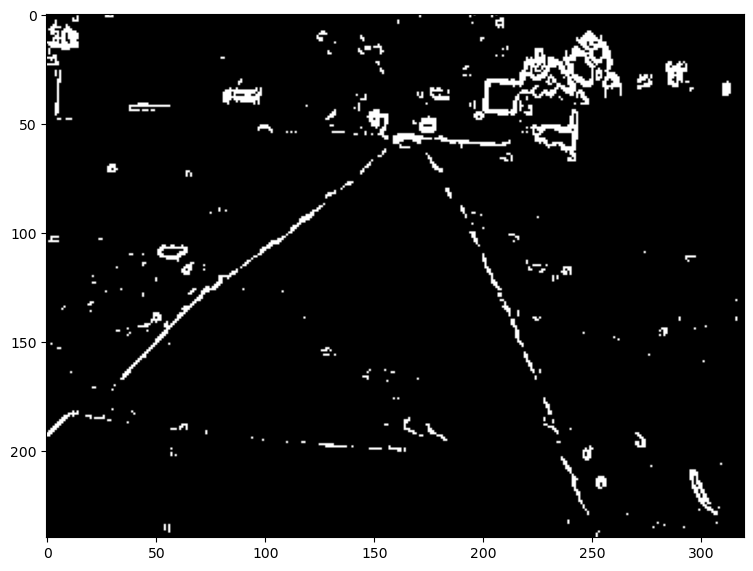

In [ ]:
mostrar(bordes_gradiente(suavizado_gauss(frame1, 0.5), 210, "sobel"))

In [ ]:
bordes = bordes_gradiente(suavizado_gauss(frame1, 0.5), 210, "sobel")
maximo = ((np.shape(bordes)[0] ** 2 + np.shape(bordes)[1] ** 2) ** (1 / 2)) + 1
maximo = int(maximo)
donde = np.nonzero(bordes)
angulos = np.linspace(-np.pi / 2, np.pi / 2, 181)
A = np.zeros((maximo * 2, np.size(angulos)), dtype=np.uint8)

contador = 0
for ang in angulos:
    rhos = np.int8(np.round(donde[0] * np.cos(ang) + donde[1] * np.sin(ang))) + maximo
    cantidades = np.bincount(rhos)
    cantidades = np.resize(cantidades, np.shape(A)[0])
    A[:, contador] = cantidades
    contador = contador + 1


ValueError: 'list' argument must have no negative elements

In [ ]:
lineas = np.where(A == 91)
a = np.array([1,2])
b = np.array([2,2])
# np.isclose(lineas[0])

In [ ]:
lineas

(array([291, 293]), array([127, 130]))

In [ ]:
def muestra_linea(imagen, angulo, rho):
    ancho = np.shape(imagen)[1]
    y = np.linspace(0, ancho - 1, ancho)
    # if angulo != 0:
    x = (rho - y * np.sin(angulo)) / np.cos(angulo)
    # else:
    #     y = np.zeros(np.shape(imagen)[1]) + rho

    plt.ylim(np.shape(imagen)[0],0)

    plt.title("titulo")
    plt.imshow(imagen, cmap='gray', vmin=0, vmax=255)
    plt.plot(y, x)

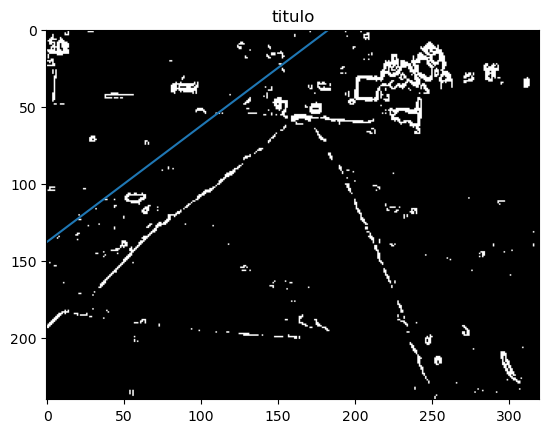

In [ ]:
muestra_linea(bordes, angulos[lineas[1][0]], -1 * (lineas[0][0] - maximo))

In [ ]:
lineas[0][0] - maximo

-110

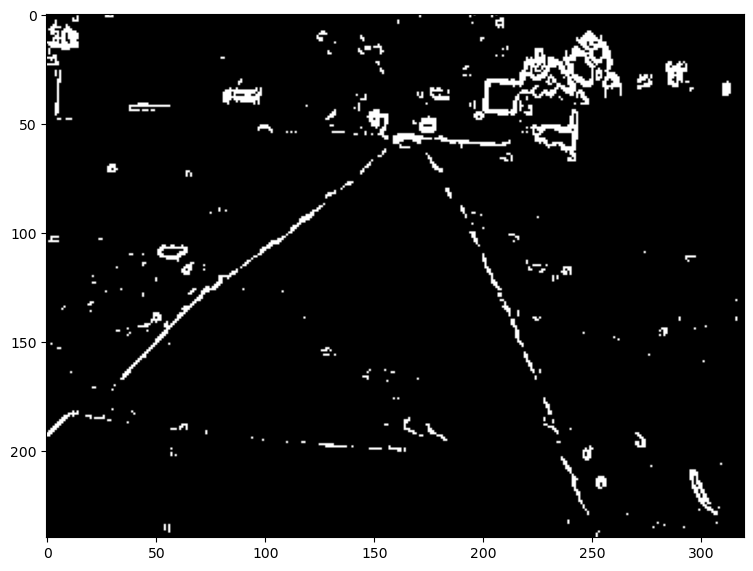

In [ ]:
mostrar(bordes)

In [ ]:
angulos[lineas[1][0]]

0.6457718232379022

In [ ]:
rhos = np.int8(np.round(donde[0] * np.cos(np.pi/4) + donde[1] * np.sin(np.pi/4))) + maximo
cantidades = np.bincount(rhos)
cantidades = np.resize(cantidades, np.shape(A)[0])
A[:, 0] = cantidades

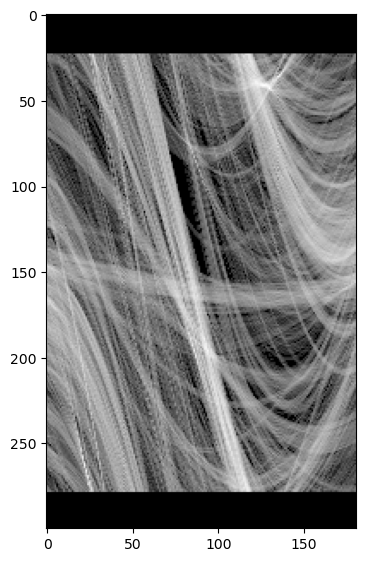

In [ ]:
plt.figure(figsize=(4, 19))

plt.imshow(pasarALog(A[250:550, :]), cmap='gray', vmin=0, vmax=255)

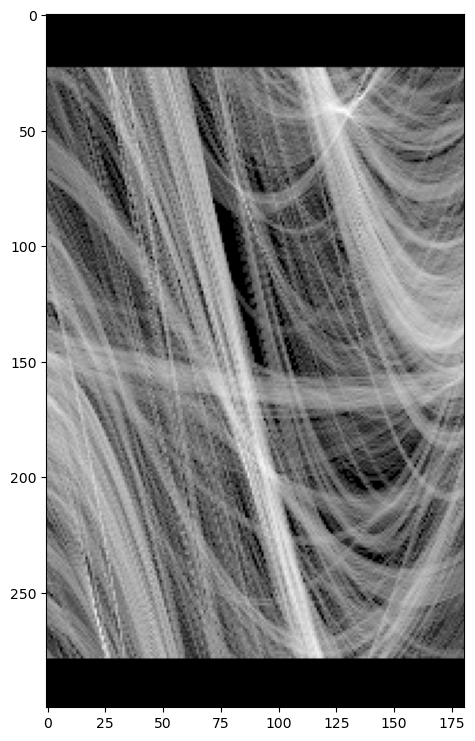

In [ ]:
mostrar(pasarALog(A[250:550, :]))

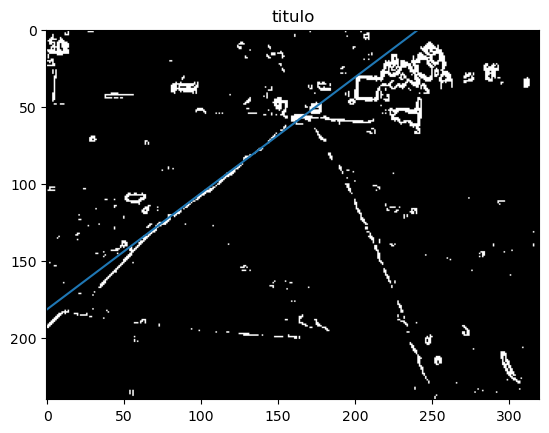

In [ ]:
muestra_linea(bordes, angulos[127], 145)

3.2679489653813835e-07